In [1]:
import json

# Load the JSON file
with open("./data/sarcasm.json", 'r') as f:
    datastore = json.load(f)

# Initialize the lists
sentences = []
labels = []

# Collect sentences and labels into the lists
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [2]:
training_size = 20000

# Split the sentences
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]

# Split the labels
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [3]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 10000
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

# Generate the word index dictionary
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

# Generate and pad the training sequences
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Generate and pad the testing sequences
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Convert the labels lists into numpy arrays
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

In [ ]:
import tensorflow as tf

# Parameters
embedding_dim = 16
lstm_dim = 32
dense_dim = 24

# Model Definition with LSTM
model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Set the training parameters
model_lstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Print the model summary
model_lstm.summary()

In [5]:
NUM_EPOCHS = 10

# Train the model
history_lstm = model_lstm.fit(training_padded, training_labels, epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels))

Epoch 1/10


2022-03-26 07:33:08.123475: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8201


625/625 [==============================] - 10s 10ms/step - loss: 0.4081 - accuracy: 0.7982 - val_loss: 0.3370 - val_accuracy: 0.8551
Epoch 2/10
625/625 [==============================] - 5s 9ms/step - loss: 0.2238 - accuracy: 0.9081 - val_loss: 0.3793 - val_accuracy: 0.8450
Epoch 3/10
625/625 [==============================] - 5s 8ms/step - loss: 0.1587 - accuracy: 0.9405 - val_loss: 0.4003 - val_accuracy: 0.8489
Epoch 4/10
625/625 [==============================] - 5s 8ms/step - loss: 0.1100 - accuracy: 0.9596 - val_loss: 0.4761 - val_accuracy: 0.8462
Epoch 5/10
625/625 [==============================] - 6s 9ms/step - loss: 0.0730 - accuracy: 0.9754 - val_loss: 0.5660 - val_accuracy: 0.8444
Epoch 6/10
625/625 [==============================] - 6s 9ms/step - loss: 0.0444 - accuracy: 0.9861 - val_loss: 0.6919 - val_accuracy: 0.8356
Epoch 7/10
625/625 [==============================] - 6s 9ms/step - loss: 0.0297 - accuracy: 0.9912 - val_loss: 0.7809 - val_accuracy: 0.8350
Epoch 8/10
625/

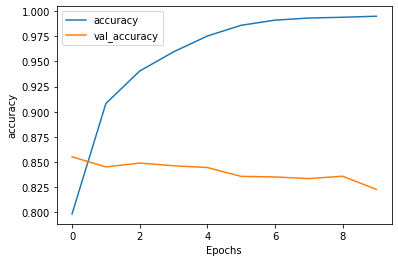

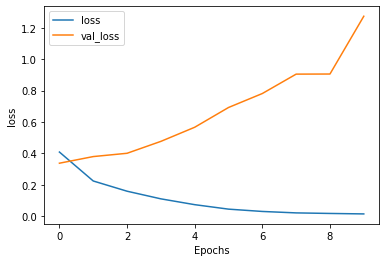

In [6]:
import matplotlib.pyplot as plt

# Plot Utility
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

# Plot the accuracy and loss history
plot_graphs(history_lstm, 'accuracy')
plot_graphs(history_lstm, 'loss')